In [3]:
"""
Provided code for Application portion of Module 1

Imports physics citation graph 
"""
import urllib2
import matplotlib.pyplot as plt 
import numpy as np
import math

# Set timeout for CodeSkulptor if necessary
#import codeskulptor
#codeskulptor.set_timeout(20)

In [4]:
###################################
# Code for loading citation graph

CITATION_URL = "http://storage.googleapis.com/codeskulptor-alg/alg_phys-cite.txt"

def load_graph(graph_url):
    """
    Function that loads a graph given the URL
    for a text representation of the graph
    
    Returns a dictionary that models a graph
    """
    graph_file = urllib2.urlopen(graph_url)
    graph_text = graph_file.read()
    graph_lines = graph_text.split('\n')
    graph_lines = graph_lines[ : -1]
    
    length=len(graph_lines)
    
    print "Loaded graph with", length, "nodes"
    
    answer_graph = {}
    for line in graph_lines:
        neighbors = line.split(' ')
        node = int(neighbors[0])
        answer_graph[node] = set([])
        for neighbor in neighbors[1 : -1]:
            answer_graph[node].add(int(neighbor))
    return answer_graph, length

In [5]:
"""
Three dictionaries representing three directed graphs.

Also included five functions:
Using the number of nodes to create a complete directed graph;
Using a directed graph to compute the number of degrees for the node;
Using a directed graph to compute un-normailzed degrees of the in-degrees.
Normalize a given in-degree distribution

"""

# EX_GRAPH0={0: set([1,2]), 1: set([]), 2: set([])}

# EX_GRAPH1={0: set([1,4,5]), 1: set([2,6]), 2: set([3]),
#           3: set([0]), 4: set([1]), 5: set([2]),6: set([])}

# EX_GRAPH2={0: set([1,4,5]), 1: set([2,6]), 2: set([3,7]),
#           3: set([7]), 4: set([1]), 5: set([2]),
#           6: set([]), 7: set([3]), 8: set([1,2]), 9: set([0,3,4,5,6,7])}

def make_complete_graph(num_nodes):
    '''
    Returns a dictionary corresponding to
    a complete directed graph with the specified 
    number of nodes
    '''
    graph={}
    if num_nodes==0:
        return graph
    else:
        for node in range(num_nodes):
            edge = [dummy_i for dummy_i in range(num_nodes) \
                    if node != dummy_i]
            graph[node] = set(edge)
        return graph

#computing degree distributions
def compute_in_degrees(digraph):
    '''
    Takes a graph and compute 
    in-degrees for the node in the graph
    '''
    in_graph={}
    if digraph=={}:
        return in_graph

    for key in digraph.keys():
        in_graph[key]=0
    
    for value in digraph.values():
        for item in list(value):
            in_graph[item]+=1
        
    return in_graph


def in_degree_distribution(digraph):
    '''
    Takes a directed graph, computes the 
    unnormalized distribution of the in-degrees of the graph.
    Return a dictionary whose keys correspond to 
    in-degrees of nodes in graph, and value is the 
    number of nodes with that in-degree.
    ''' 
    freq_list={}
    in_degree=compute_in_degrees(digraph)

    for key in in_degree:
        if freq_list.has_key(in_degree[key]):
            freq_list[in_degree[key]]+=1
        else:
            freq_list[in_degree[key]]=1

    return freq_list

def normalize(distribution_graph, length):
    length*=1.0
    for key in distribution_graph:
        distribution_graph[key]/= length
    return distribution_graph

# The function build_plot is for scodesculptor to do simulation
# def build_plot(graph):
#     """
#     Build plot of the number of increments in mystery function
#     """
#     plot= {}
#     for key in graph:
#         if key != 0:
#             plot[math.log(key*1.0)]=math.log(graph[key])       
#     return plot

# Question 1

In [6]:
citation_graph, citation_length = load_graph(CITATION_URL)

#compute the in-degree distribution for this citation graph, and normalize it
in_degree_distribution= normalize(in_degree_distribution(citation_graph), citation_length)

Loaded graph with 27770 nodes


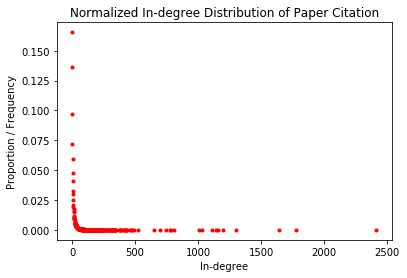

In [7]:
# make a plot using normalized/ un-logged data
plt.plot(in_degree_distribution.keys(), in_degree_distribution.values(), 'r.')
plt.title('Normalized In-degree Distribution of Paper Citation');
plt.xlabel('In-degree')
plt.ylabel('Proportion / Frequency')
plt.show()
plt.close()

In [8]:
# compute a log/log plot of the points in this normalized distribution
def make_log(citation_graph):
    dic1={}
    for key in citation_graph:
        if key !=0:
            dic1[math.log(key)]=math.log(citation_graph[key])
    return dic1

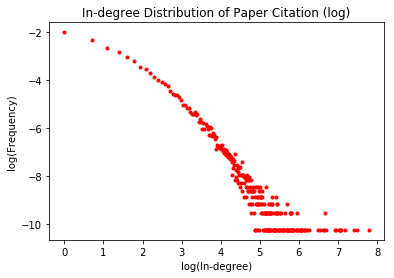

In [9]:
log_distribution = make_log(in_degree_distribution)

plt.plot(log_distribution.keys(), log_distribution.values(), 'r.')
plt.title('In-degree Distribution of Paper Citation (log)');
plt.xlabel('log(In-degree)')
plt.ylabel('log(Frequency)')
plt.show()
plt.close()

# Question 2

In [10]:
import random 

In [11]:
#generate random directed graphs with probability p
def random_simulation(length, probability):
    dict1={}
    for dummy_i in range(length):    
        dict1[dummy_i]=set()
        for dummy_j in range(length):  
            if dummy_i != dummy_j:
                random_val=random.random()
                if random_val < probability:
                    dict1[dummy_i].add(dummy_j)            
    return dict1

In [12]:
length = 10000
probability=0.6

q2 = in_degree_distribution(random_simulation(length, probability))
q2_distribution= normalize(q2,length)

KeyboardInterrupt: 

In [ ]:
# make a plot using normalized/ un-logged data
plt.plot(q2_distribution.keys(), q2_distribution.values(), 'r.')
plt.title('Normalized In-degree Distribution of ER p=0.6');
plt.xlabel('In-degree')
plt.ylabel('Proportion / Frequency')
plt.show()
plt.close()

In [ ]:
q2_log_distribution = make_log(q2_distribution)

plt.plot(q2_log_distribution.keys(), q2_log_distribution.values(), 'r.')
plt.title('In-degree Distribution of ER p=0.6 (log)');
plt.xlabel('log(In-degree)')
plt.ylabel('log(Frequency)')
plt.show()
plt.close()

1. Is the expected value of the in-degree the same for every node in an ER graph?
Yes.  The expected value of in-degree is (n-1)*p for every node of ER(n, p)
2. What does the in-degree distribution for an ER graph look like? 
The dot plot of in-degree distribution forms the shape of normal distribution centered at sample_size* probability.
3. Does the shape of the in-degree distribution plot for ER look similar to the shape of the in-degree distribution for the citation graph?  
Points mostly fall on in-degree between 0 and 500 for citation graph, whereas more points are at the center of the normal distribution (sample_size*probability).
Points in both curves can be approximated by non-linear curve/ The cohenrence of the points exist in both graphs. Citation can be approximated by a logarithmic curve, and ER can be described by a Gaussian function, even though is some randomness in ER graph.
In citation graph, the slope decreases and then goes up. In ER graph, the slope goes up first and then down.

# Question 3

In [13]:
#average out-degree of physics citation graph: equal to average in-degree

def get_avg_degree(in_graph):
    '''
    take a in_graph and return an integer average in/out degree of the graph
    '''
    length=0
    total_degree=0
    in_degree=compute_in_degrees(citation_graph)
    for key in in_degree:
        length+=1
        total_degree+=in_degree[key]
    
    total_degree*=1.0
    return total_degree/length

print get_avg_degree(citation_graph)

12.7032048974


m edge (avg out-degree of citation graph): 12.7
n node: 28000

# Question 4

In [14]:
"""
Provided code for application portion of module 1

Helper class for implementing efficient version
of DPA algorithm
"""
class DPATrial:
    """
    Simple class to encapsulate optimized trials for DPA algorithm
    
    Maintains a list of node numbers with multiple instances of each number.
    The number of instances of each node number are
    in the same proportion as the desired probabilities
    
    Uses random.choice() to select a node number from this list for each trial.
    """

    def __init__(self, num_nodes):
        """
        Initialize a DPATrial object corresponding to a 
        complete graph with num_nodes nodes
        
        Note the initial list of node numbers has num_nodes copies of
        each node number
        """
        self._num_nodes = num_nodes
        self._node_numbers = [node for node in range(num_nodes) for dummy_idx in range(num_nodes)]

    def run_trial(self, num_nodes):
        """
        Conduct num_node trials using by applying random.choice()
        to the list of node numbers
        
        Updates the list of node numbers so that the number of instances of
        each node number is in the same ratio as the desired probabilities
        
        Returns:
        Set of nodes
        """
        
        # compute the neighbors for the newly-created node
        new_node_neighbors = set()
        for dummy_idx in range(num_nodes):
            new_node_neighbors.add(random.choice(self._node_numbers))
        
        # update the list of node numbers so that each node number 
        # appears in the correct ratio
        self._node_numbers.append(self._num_nodes)
        self._node_numbers.extend(list(new_node_neighbors))
        
        #update the number of nodes
        self._num_nodes += 1
        return new_node_neighbors

def func_dpa(node_num, m):
    '''
    Generate a full graph using algorithm DPA
    
    node_num: final number of nodes
    m: the existing number of nodes
    '''
    in_graph=make_complete_graph(m)
    dpa=DPATrial(m)
    for dummy_i in range(m, node_num):
        node_list= dpa.run_trial(m)
        in_graph[dummy_i] = node_list
        for node in node_list:
            in_graph[node].add(dummy_i)
            
    return in_graph

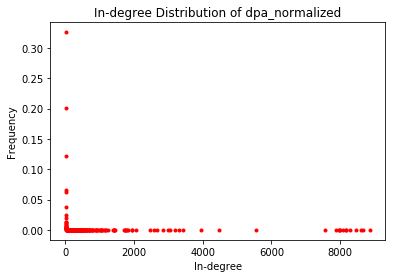

In [186]:
plt.plot(dpa_normalized.keys(), dpa_normalized.values(), 'r.')
plt.title('In-degree Distribution of dpa_normalized');
plt.xlabel('In-degree')
plt.ylabel('Frequency')
plt.show()
plt.close()

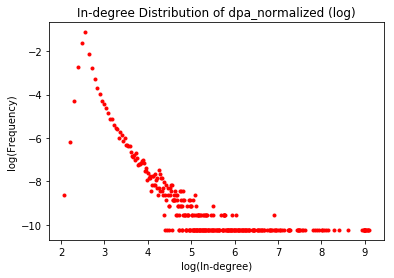

In [187]:
dpa_log_normalized = make_log(dpa_normalized)

plt.plot(dpa_log_normalized.keys(), dpa_log_normalized.values(), 'r.')
plt.title('In-degree Distribution of dpa_normalized (log)');
plt.xlabel('log(In-degree)')
plt.ylabel('log(Frequency)')
plt.show()
plt.close()

# Question 5

1. Is the plot of the in-degree distribution for the DPA graph similar to that of the citation graph? 
There are similar number of points in the DPA and citation plots.
There is coherence in both plots, which can be approximated by non-linear logarithmic curves.
The slopes of two lines both decreases first and then goes up (stay nearly as horizontal line).
2. Which one of the three social phenomena listed above mimics the behavior of the DPA process?
The "Hierarchical structure of networks" phenomenon. Both are iterative algorithms that grow a cluster from an initial one by following a certain rule.
3. Could one of these phenomena explain the structure of the physics citation graph? 
The "rich gets richer" phenomenon. From the normalized in-degree distribution graph we see that it can be described by power-law distribution, meaning that a small number of papers get the most of the citations.

In [ ]:
#http://www.codeskulptor.org/#user46_KqH4jvJ6DWsgXtw_0.py
#http://www.codeskulptor.org/#user46_2bhe79mDgn_4.py
#http://www.codeskulptor.org/#user46_MDWaUylETR_8.py